In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('/content/fitness analysis.csv')
df.head(3)

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [2]:
# Drop name of participant
df = df.drop('Your name ', axis=1)
# Rename columns of data set, keep questionary in dict
short_col_names = ['Date', 'Gender', 'Age', 'ImportanceExercise', 'FitnessLevel', 'Frequency', 'Barriers', 'Activity',\
    'DoYouDo', 'Daytime', 'Unit', 'Diet', 'BarriersDiet', 'SelfRatingDiet', 'RecommendedFriend', 'PurchasedEquipment', 'Motivation']
questionaries = {k: l for k,l in zip(short_col_names, df.columns)}
df.columns = short_col_names

In [3]:
print('Number of participants: {}'.format(df.shape[0]))
nr_women = (df['Gender'] == 'Female').sum()/df.shape[0] * 100
print('Proportion of women: {:.1f}%'.format(nr_women))
# Time period of survey
timestamp = pd.to_datetime(df.Date)
period = (timestamp.min().year, timestamp.min().month, (timestamp.max() - timestamp.min()).days)
print('The survey was in {}.{} and took {} days.'.format(*period))

Number of participants: 545
Proportion of women: 55.4%
The survey was in 2019.7 and took 17 days.


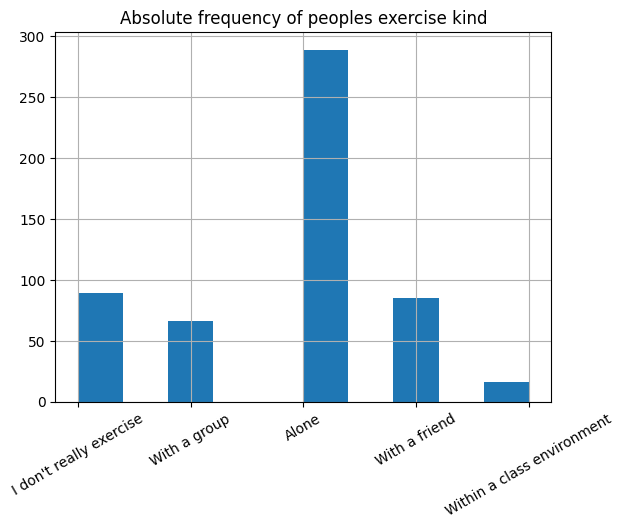

In [4]:
df['DoYouDo'].hist().set(title='Absolute frequency of peoples exercise kind');
plt.xticks(rotation=30, horizontalalignment="center");

In [5]:
print('Relative frequency of how do people exercise')
df.DoYouDo.value_counts(True)*100

Relative frequency of how do people exercise


Alone                         53.027523
I don't really exercise       16.330275
With a friend                 15.596330
With a group                  12.110092
Within a class environment     2.935780
Name: DoYouDo, dtype: float64

In [7]:
def break_manifold_answer_get_relation(dt_frm, col_manifold, col_relation, str_separator=';'):
    """
    method to split entries of a column when multiple answers were given and get relationship to a second column
    Parameters
        dt_frm : pandas dataframe
                dataframe with data entries of multiple answers and column with data to get relationship
        col_manifold : string
                column name of data entries with multiple answers; data entry is string
        col_relation : string
                name of column with data of certain relationsship
        str_separator : string
                split string in col_manifold using this separator; default is ;
    Returns
        dt_frm_relationship : pandas dataframe
                dataframe with index = items of col_relation, columns = items of col_manifold, values = absolute frequency
    """
    dt_frm_isolated = dt_frm[col_manifold].str.split(str_separator, expand=True)
    # to get a relation to data in col_relation set it as index
    dt_frm_isolated.set_index(dt_frm[col_relation], inplace=True)

    # reduce number of columns to a single one by method stack; with col_relation as index the isolated answers are still assigned after calling stack
    dt_frm_stacked = dt_frm_isolated.stack()
    dt_frm_stacked = dt_frm_stacked.droplevel(level=1)
    dt_frm_stacked = dt_frm_stacked.reset_index(name=col_manifold)

    # grouping to get relationship between col_manifold and col_relation
    dt_frm_group = dt_frm_stacked.groupby(by=[col_manifold, col_relation]).size()
    dt_frm_group = dt_frm_group.reset_index(name='abs_Freq')

    # reshape data frame (pivot table)
    dt_frm_relationship = dt_frm_group.pivot(index=col_relation, columns=col_manifold, values='abs_Freq')

    return dt_frm_relationship

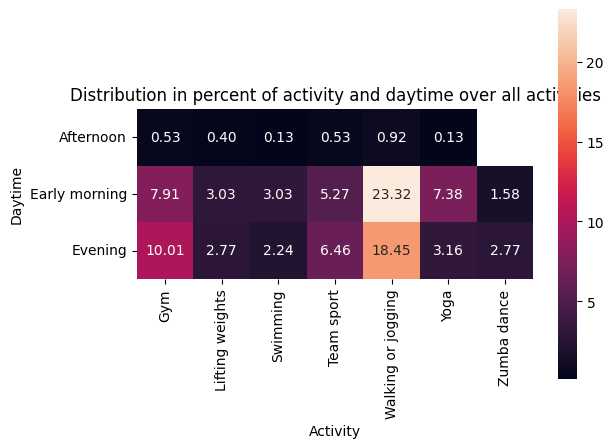

In [8]:
df_activity_daytime = break_manifold_answer_get_relation(df, 'Activity', 'Daytime')
# drop answer "I don't really exercise"
df_activity_daytime.drop(columns=["I don't really exercise"], inplace=True)
df_activity_daytime *= 100/df_activity_daytime.sum().sum()
sb.heatmap(df_activity_daytime, annot=True, fmt="0.2f", square=True).set(title='Distribution in percent of activity and daytime over all activities');


In [9]:
df_activity_daytime.sum(axis=1)

Daytime
Afternoon         2.635046
Early morning    51.515152
Evening          45.849802
dtype: float64

In [10]:
# Definition of people who don't exercise
# answered "I don't really exercise" on question "Do you exercise?"
no_exercise_str = "I don't really exercise"
mask = df.DoYouDo == no_exercise_str
df_unactive = df.loc[mask].copy()

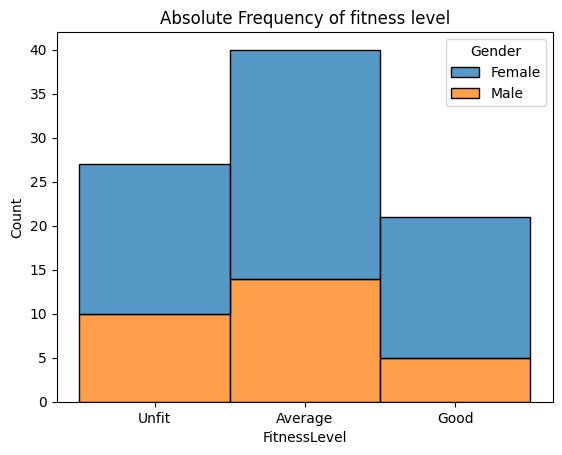

In [11]:
# histogram plot
df_unactive.FitnessLevel = pd.Categorical(df_unactive['FitnessLevel'].copy(), categories=['Unfit', 'Average', 'Good', 'Very Good', 'Perfect'], ordered=True)
df_unactive.sort_values(by=['FitnessLevel'], inplace=True)
sb.histplot(data=df_unactive.dropna(axis=0, subset=['FitnessLevel']), x='FitnessLevel', hue='Gender', multiple='stack').set(title='Absolute Frequency of fitness level');


In [12]:
print("self-evaluation fitness level of people who don't really exercise in percentage")
print("Women:")
print(df_unactive.FitnessLevel[df_unactive.Gender == 'Female'].value_counts(normalize=True))
print("Men:")
print(df_unactive.FitnessLevel[df_unactive.Gender == 'Male'].value_counts(normalize=True))

self-evaluation fitness level of people who don't really exercise in percentage
Women:
Average      0.440678
Unfit        0.288136
Good         0.271186
Very Good    0.000000
Perfect      0.000000
Name: FitnessLevel, dtype: float64
Men:
Average      0.482759
Unfit        0.344828
Good         0.172414
Very Good    0.000000
Perfect      0.000000
Name: FitnessLevel, dtype: float64


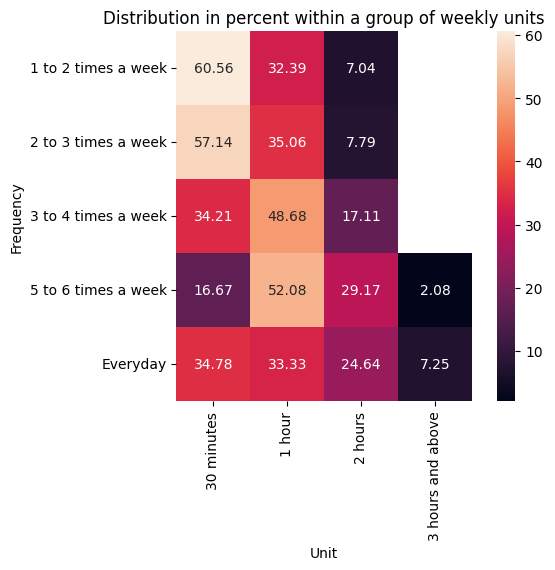

In [13]:
df_frq_unit = df.groupby(by=['Frequency', 'Unit']).size()
df_frq_unit = df_frq_unit.reset_index(name='abs_Freq')
df_frq_unit_p = df_frq_unit.pivot(index='Frequency', columns='Unit', values='abs_Freq')

# drop 'Never' in Frequency ('How often do you exercise?')
# drop 'I don't really exercise' in Unit
df_frq_unit_p.drop('Never', axis=0, inplace=True)
df_frq_unit_p.drop(no_exercise_str, axis=1, inplace=True)

# reorder
df_frq_unit_p = df_frq_unit_p[['30 minutes', '1 hour', '2 hours', '3 hours and above']]

# normalize within a row ('Frequency')
df_frq_unit_p = df_frq_unit_p.divide(df_frq_unit_p.sum(axis=1)/100, axis=0)

sb.heatmap(df_frq_unit_p, annot=True, fmt="0.2f", square=True).set(title='Distribution in percent within a group of weekly units');